<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Marco/TechLabs__finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now it's time for the predictions. The R-value I will use for that (the one that we want to be able to change with a slider) will unlike in the dataframe before not be one that is taken from a whole week but only from the past four days. The R_7 was used to reduce noise in the data, now we chose the R-value by ourselves, so there is no noise. First I will make a prediction for Germany for the next four weeks:

# TechLabs final project(problem 2 - group 8)

This Notebook is to work in the final project for Techlabs code-at-home course.
Members: Luca Wulfert, Laura Laks, Phillip Guske, Juliana Bedoya and Alejandro Echavarria

### libraries

In [0]:
import pandas as pd

### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

### Usefull databases

this is the DB that appear in kaggle.

In [0]:
data_confirmed = pd.read_csv(confirmed_csv_url)
data_death = pd.read_csv(death_csv_url)
data_recovered = pd.read_csv(recovered_csv_url)

### Code for all data cleaning

In [0]:
# Dropping all the innecesary columns
data_confirmed = data_confirmed.drop(['Province/State', 'Lat', 'Long'], axis = 1)
data_death = data_death.drop(['Province/State', 'Lat', 'Long'], axis = 1)
data_recovered = data_recovered.drop(['Province/State', 'Lat', 'Long'], axis = 1)

# Set New index
data_confirmed = data_confirmed.set_index('Country/Region')
data_death = data_death.set_index('Country/Region')
data_recovered = data_recovered.set_index('Country/Region')

# Groupping duplicated columns
data_confirmed = data_confirmed.groupby(by = data_confirmed.index, axis = 0).sum()
data_death = data_death.groupby(by= data_death.index, axis = 0 ).sum()
data_recovered = data_recovered.groupby(by= data_recovered.index, axis = 0).sum()

# add a total row
data_confirmed.loc['Global'] = data_confirmed.sum(axis=0)
data_death.loc['Global'] = data_death.sum(axis=0)
data_recovered.loc['Global'] = data_recovered.sum(axis=0)

In [202]:
data_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,43,45,45,48,48,52,57,61,65,70,74,76,84,84,88,88,95,97,106,109,119,124,137,138,146,153,167,252,267,267,441,446,654,654,679,753,761,772,832,866


In [203]:
data_confirmed.loc['Zambia']

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
          ... 
5/17/20    753
5/18/20    761
5/19/20    772
5/20/20    832
5/21/20    866
Name: Zambia, Length: 121, dtype: int64

Transposing the Dataframe so we now have Date as index and country as columns;
Changing the type of the index column to datetime:

In [0]:
data_confirmed=data_confirmed.T
data_confirmed.rename_axis(index='Date', columns="Country",inplace=True)

###has to be changed to this in master branch, otherwise does not change to datetime index
data_confirmed.index=pd.to_datetime(data_confirmed.index)

In [205]:
data_confirmed.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21'],
              dtype='datetime64[ns]', name='Date', length=121, freq=None)

In [206]:
data_confirmed.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'Global'],
      dtype='object', name='Country', length=189)

Test: Slicing the dataframe to only have the data for Germany:

In [207]:
germany_confirmed=data_confirmed.loc[:,["Germany"]]
germany_confirmed["Total Cases"]=germany_confirmed["Germany"]
germany_confirmed.drop("Germany",inplace=True, axis=1)
germany_confirmed.rename_axis(columns="Germany",inplace=True)
germany_confirmed.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21'],
              dtype='datetime64[ns]', name='Date', length=121, freq=None)

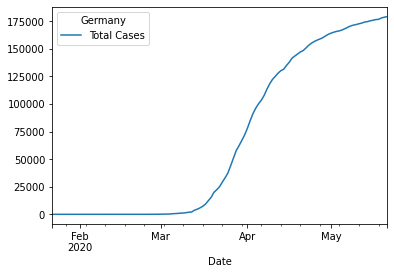

In [208]:
germany_confirmed.plot()

Calculating the R-value for any given day: I'm using the method the Robert-Koch-Institute uses - It is done by dividing the sum of new cases from the last seven days by the sum of new cases four days before that. 
I will be calling this value R_7
Four days is the generational interval, which is the time it takes on average for one infection to be transmitted to the next generation (because one isn't infectious right away). 
The seven days is used to smoothen the curve by reducing noise, so that the R-value does not change so much from day to day. 

First: New Column with new cases compared to previous day:

In [0]:
germany_confirmed["New Cases"]=germany_confirmed["Total Cases"]-germany_confirmed.shift(1)["Total Cases"]

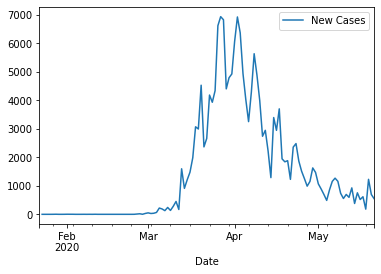

In [210]:
germany_confirmed.plot(y="New Cases")

Now: Create new column with calculated R_7 values



In [0]:
germany_confirmed["R_7"]=(germany_confirmed["Total Cases"]-germany_confirmed.shift(7)["Total Cases"])/(germany_confirmed.shift(4)["Total Cases"]-germany_confirmed.shift(11)["Total Cases"])

In [212]:
germany_confirmed.tail()

Germany,Total Cases,New Cases,R_7
Date,,,
2020-05-17,176369,617.0,0.756402
2020-05-18,176551,182.0,0.787441
2020-05-19,177778,1227.0,0.991819
2020-05-20,178473,695.0,0.988031
2020-05-21,179021,548.0,1.011804


Comment for the R_value-calculation: Especially for the beginning this throws unrealistically high values, because consecutive days where no new cases are detected, so if one new case is detected one day, it sometimes even returns infinitely high R-values. See plot for visualisation:

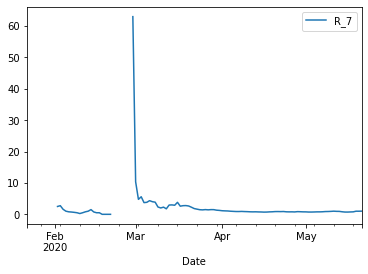

In [213]:
germany_confirmed.plot(y="R_7")

Let's try to plot the same only for values from mid-March onwards (note that the times when the R-values become realistic or even start becoming unrealistic again are different for different countries, something we have to keep in mind for our interactive maps):

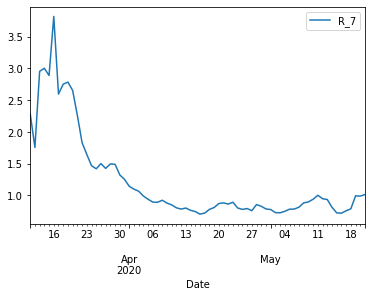

In [214]:
germany_confirmed["3/11/20":].plot(y="R_7")

This is the full code that I used to create the germany_confirmed dataframe:

In [0]:
germany_confirmed=data_confirmed.loc[:,["Germany"]]
germany_confirmed["Total Cases"]=germany_confirmed["Germany"]
germany_confirmed.drop("Germany",inplace=True, axis=1)
germany_confirmed.rename_axis(columns="Germany",inplace=True)

germany_confirmed["New Cases"]=germany_confirmed["Total Cases"]-germany_confirmed.shift(1)["Total Cases"]

germany_confirmed["R_7"]=(germany_confirmed["Total Cases"]-germany_confirmed.shift(7)["Total Cases"])/(germany_confirmed.shift(4)["Total Cases"]-germany_confirmed.shift(11)["Total Cases"])

Now create a function that can create the same dataframe for any country we want:

In [0]:
def create_country(country):
  country_confirmed=data_confirmed.loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"]
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])

  return(country_confirmed)

In [217]:
create_country("Argentina").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2020-01-22 to 2020-05-21
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  121 non-null    int64  
 1   New Cases    120 non-null    float64
 2   R_7          80 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 8.8 KB


I now create a dictionary with all the dataframes for every country

In [0]:
country_dataframes = {country: create_country(country) for country in data_confirmed.columns}

In [219]:
country_dataframes['Germany'].tail(20)

Germany,Total Cases,New Cases,R_7
Date,,,
2020-05-02,164967,890.0,0.727476
2020-05-03,165664,697.0,0.724819
2020-05-04,166152,488.0,0.748381
2020-05-05,167007,855.0,0.781560
2020-05-06,168162,1155.0,0.783416
2020-05-07,169430,1268.0,0.813403
2020-05-08,170588,1158.0,0.880579
2020-05-09,171324,736.0,0.895983
2020-05-10,171879,555.0,0.938396


This all works. Once again - the full code to create this dictionary is as follows:

In [0]:
germany_confirmed=data_confirmed.loc[:,["Germany"]]
germany_confirmed["Total Cases"]=germany_confirmed["Germany"]
germany_confirmed.drop("Germany",inplace=True, axis=1)
germany_confirmed.rename_axis(columns="Germany",inplace=True)

germany_confirmed["New Cases"]=germany_confirmed["Total Cases"]-germany_confirmed.shift(1)["Total Cases"]

germany_confirmed["R_7"]=((germany_confirmed["Total Cases"]-germany_confirmed.shift(7)["Total Cases"])/
                          (germany_confirmed.shift(4)["Total Cases"]-germany_confirmed.shift(11)["Total Cases"]))

def create_country(country):
  country_confirmed=data_confirmed.loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=(country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"])
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])
  return(country_confirmed)

country_dataframes = {country: create_country(country) for country in data_confirmed.columns}

In [221]:
country_dataframes["Argentina"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2020-01-22 to 2020-05-21
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  121 non-null    int64  
 1   New Cases    120 non-null    float64
 2   R_7          80 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 8.8 KB


Now it's time to make some projections. Note that the R-value we will use and that will be changeable by a slider is different from the R_7 I calculated for the past data. The R_7 had the purpose to reduce noise in the data we had from the past. The R-value for the projection is a value we chose and create new data with, so there is no noise. 

By default, I chose the R_slidervalue to be the same as the last of the calculated R_7

In [234]:
from datetime import timedelta
germany_prediction=(pd.DataFrame(index=pd.date_range(start=country_dataframes["Germany"].index[-1], periods=14, freq='D'), 
                                 columns=["Total Cases", "New Cases", "R_7"]))
germany_prediction.drop(germany_prediction.index[0], inplace=True)
germany_prediction.rename_axis(index='Date', columns="Germany",inplace=True)
germany_prediction.index=pd.to_datetime(germany_prediction.index)
country_dataframes['Germany']["Prediction"]=False
germany_prediction["Prediction"]=True

germany_combined=pd.concat([country_dataframes['Germany'], germany_prediction])

R_slidervalue_germany=country_dataframes["Germany"]["R_7"][-1]

for date in germany_combined.index:
  if germany_combined.loc[date, 'Prediction']:
    germany_combined.loc[date, 'Total Cases']=R_slidervalue_germany*(germany_combined.shift(4).loc[date, 'Total Cases']-germany_combined.shift(5).loc[date, 'Total Cases'])+germany_combined.shift(1).loc[date, 'Total Cases']

germany_combined['New Cases']=germany_combined['Total Cases']-germany_combined.shift(1)['Total Cases']
for date in germany_combined.index:
  try:
    germany_combined.loc[date, "R_7"]=(germany_combined.loc[date, "Total Cases"]-germany_combined.shift(7).loc[date, "Total Cases"])/(germany_combined.shift(4).loc[date, "Total Cases"]-germany_combined.shift(11).loc[date, "Total Cases"])
  except ZeroDivisionError:
    germany_combined.loc[date, 'R_7']='inf'
print(germany_combined.info)
germany_combined.tail(20)




<bound method DataFrame.info of Germany    Total Cases New Cases     R_7  Prediction
Date                                                
2020-01-22           0       NaN     NaN       False
2020-01-23           0         0     NaN       False
2020-01-24           0         0     NaN       False
2020-01-25           0         0     NaN       False
2020-01-26           0         0     NaN       False
...                ...       ...     ...         ...
2020-05-30      184608   188.521  1.0118        True
2020-05-31      185879   1270.97  1.0118        True
2020-06-01      186599   719.903  1.0118        True
2020-06-02      187166   567.636  1.0118        True
2020-06-03      187357   190.747  1.0118        True

[134 rows x 4 columns]>


Germany,Total Cases,New Cases,R_7,Prediction
Date,,,,
2020-05-15,175233,755,0.72307,False
2020-05-16,175752,519,0.718365,False
2020-05-17,176369,617,0.756402,False
2020-05-18,176551,182,0.787441,False
2020-05-19,177778,1227,0.991819,False
2020-05-20,178473,695,0.988031,False
2020-05-21,179021,548,1.0118,False
2020-05-22,179205,184.148,0.999283,True
2020-05-23,180447,1241.48,1.01902,True


In [224]:
country_dataframes["Germany"]

Germany,Total Cases,New Cases,R_7,Prediction
Date,,,,
2020-01-22,0,NaN,NaN,False
2020-01-23,0,0.0,NaN,False
2020-01-24,0,0.0,NaN,False
2020-01-25,0,0.0,NaN,False
2020-01-26,0,0.0,NaN,False
...,...,...,...,...
2020-05-17,176369,617.0,0.756402,False
2020-05-18,176551,182.0,0.787441,False
2020-05-19,177778,1227.0,0.991819,False


In [226]:
country_dataframes["Germany"].head(50)

Germany,Total Cases,New Cases,R_7,Prediction
Date,,,,
2020-01-22,0,NaN,NaN,False
2020-01-23,0,0.0,NaN,False
2020-01-24,0,0.0,NaN,False
2020-01-25,0,0.0,NaN,False
2020-01-26,0,0.0,NaN,False
2020-01-27,1,1.0,NaN,False
2020-01-28,4,3.0,NaN,False
2020-01-29,4,0.0,NaN,False
2020-01-30,4,0.0,NaN,False
